In [70]:
import pygplates
import pandas as pd
import sys
sys.path.append('/Users/Simon/GIT/PlateTectonicTools/')
#import ptt.subduction_convergence as sc
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

print pygplates.__version__

from reconstruction_classes import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.0.0.16


In [71]:
# Build an object describing a reconstruction model

M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_static_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/StaticPolygons/Muller_etal_AREPS_2016_StaticPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


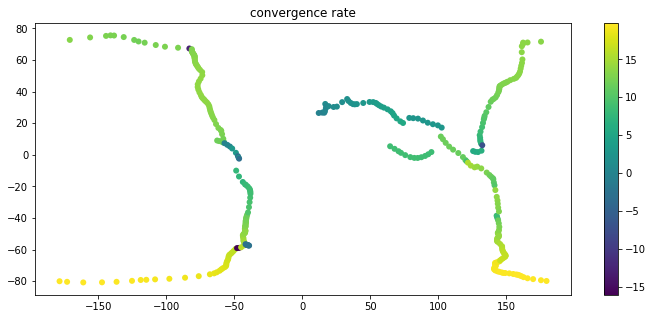

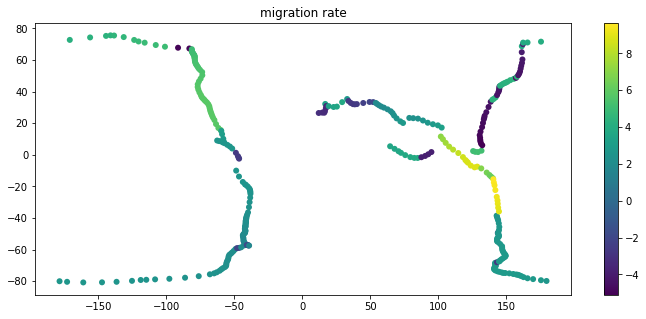

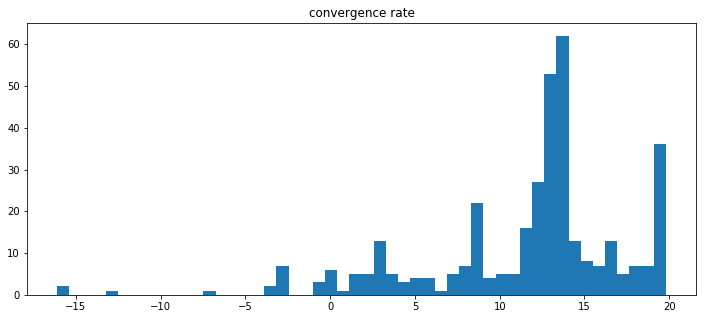

In [72]:
# compute the subduction zone kinematics for a single time snapshot
# results are returned in a 'SubductionConvergence' class object

subduction_kinematics_120Ma = M2016.subduction_convergence(120.,threshold_sampling_distance_radians=5.)

subduction_kinematics_120Ma.plot('cr')
subduction_kinematics_120Ma.plot('mr')

subduction_kinematics_120Ma.hist('cr')


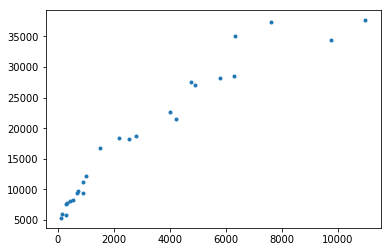

In [44]:
# generate a plate layout class for a single time snapshot

plates_90Ma = M2016.plate_snapshot(90.)

plt.plot(plates_90Ma.plate_areas,plates_90Ma.plate_perimeters,'.')


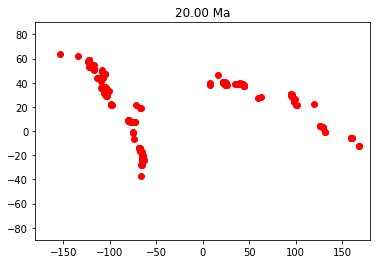

In [46]:
# load contents of a csv into a pandas dataframe, then generate a 
#'age_coded_point_dataset' object
#df = pd.read_csv('./Data/ngeo2429-s2.csv',index_col='Deposit number')
#ore_deposit_data = AgeCodedPointDataset(df,'Long.','Lat.','Age (Ma)')

ore_deposit_data = AgeCodedPointDataset('./Data/ngeo2429-s2.csv',
                                        field_mapping = {'longitude_field':'Long.',
                                                         'latitude_field':'Lat.',
                                                         'max_age_field':'Age (Ma)'})
#ore_deposit_data.from_csv('./Data/ngeo2429-s2.csv',
#                                                 'Long.','Lat.','Age (Ma)')

ore_deposit_data

ore_deposit_data.assign_reconstruction_model(M2016)

ore_deposit_data.plot_reconstructed(20.)


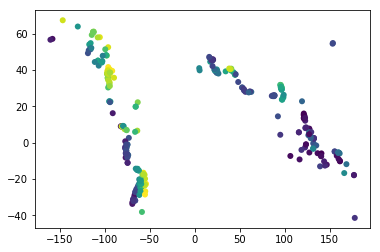

In [47]:
reconstructed_ore_deposit_data = ore_deposit_data.reconstruct_to_time_of_appearance()

plt.figure()
plt.scatter(zip(*reconstructed_ore_deposit_data)[0],
            zip(*reconstructed_ore_deposit_data)[1],
            c=zip(*reconstructed_ore_deposit_data)[2],edgecolors='')


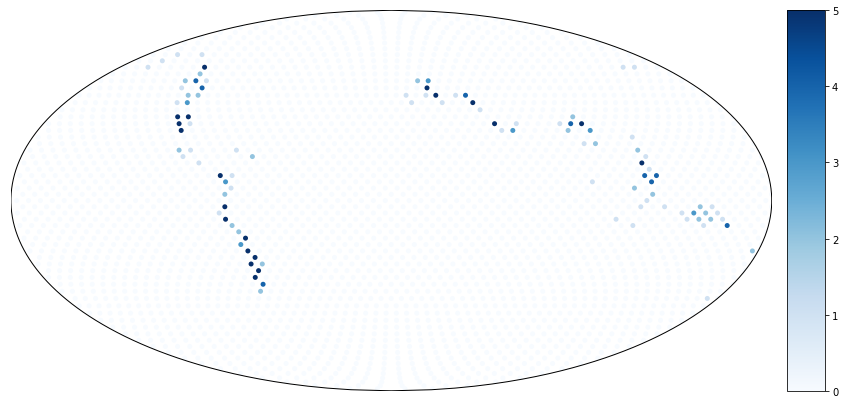

In [50]:
from mpl_toolkits.basemap import Basemap

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=16)

bin_counts = equal_area_points.point_feature_heatmap(
    [point.get_geometry() for point in ore_deposit_data._point_features])

plt.figure(figsize=(16,7))
m = Basemap(projection='moll',lon_0=0)
x,y = m(equal_area_points.longitude,
        equal_area_points.latitude)
m.scatter(x,y,c=bin_counts, s=25, edgecolors='', vmax=5, cmap=plt.cm.Blues)
m.colorbar()
plt.show()



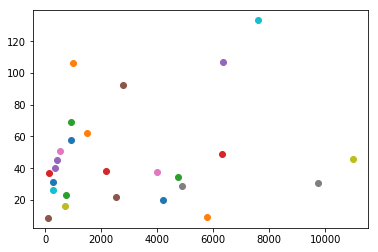

In [51]:
velocity_object = plates_90Ma.velocity_field(
    velocity_domain_features=[equal_area_points.meshnode_feature])

plt.figure()
for plate_id,plate_area in zip(plates_90Ma.plate_ids,plates_90Ma.plate_areas):
    #print plate_id,velocity_object.rms_velocity(plate_id)
    plt.plot(plate_area,velocity_object.rms_velocity(plate_id),'o')
plt.show()


0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
done


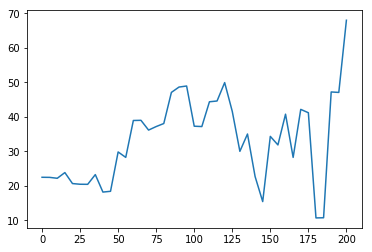

In [57]:
plate_id = 101
rms = []
time_list = range(0,201,5)

equal_area_points = PointDistributionOnSphere(distribution_type='healpix',N=16)

for time in time_list:
    print time
    plates = M2016.plate_snapshot(time)
    velocity_object = plates.velocity_field(
        velocity_domain_features=[equal_area_points.meshnode_feature])
    rms.append(velocity_object.rms_velocity(plate_id))
    
print 'done'

plt.plot(time_list,rms)


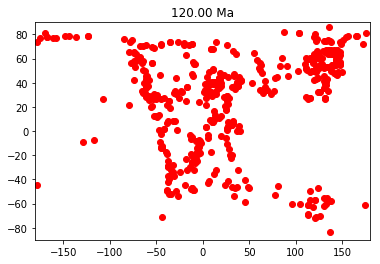

In [58]:
paleolithology_data = AgeCodedPointDataset('./Data/boucot_paleolithology_combined.shp')

paleolithology_data.assign_reconstruction_model(M2016)

paleolithology_data.plot_reconstructed(120.)


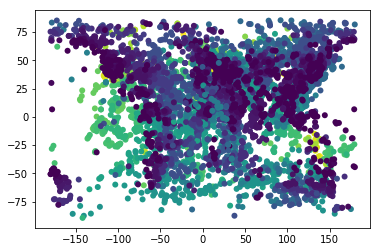

In [14]:
reconstructed_paleolithology_data = paleolithology_data.reconstruct_to_time_of_appearance()

plt.figure()
plt.scatter(zip(*reconstructed_paleolithology_data)[0],
            zip(*reconstructed_paleolithology_data)[1],
            c=zip(*reconstructed_paleolithology_data)[2],edgecolors='')


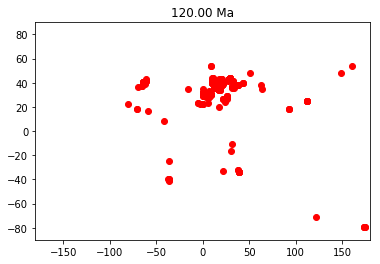

In [17]:
#parameter_dict = {'base_name':'Bryozoa',
#                  'max_ma':200.,
#                  'min_ma':0.}

url = 'https://paleobiodb.org/data1.2/occs/list.csv?base_name=Bryozoa&max_ma=200&min_ma=0&show=coords'

paleobiology_data = AgeCodedPointDataset(url)

paleobiology_data.assign_reconstruction_model(M2016)

paleobiology_data.plot_reconstructed(120.)


In [77]:
import gwsFeatureCollection

tmp = gwsFeatureCollection.FeatureCollection(layer='plate_polygons')

tmp


Exception: Remote request returned with message 
<!DOCTYPE html>
<html lang="en">
<head>
  <meta http-equiv="content-type" content="text/html; charset=utf-8">
  <meta name="robots" content="NONE,NOARCHIVE">
  <title>ArgumentError at /model/get_model_layer/</title>
  <style type="text/css">
    html * { padding:0; margin:0; }
    body * { padding:10px 20px; }
    body * * { padding:0; }
    body { font:small sans-serif; }
    body>div { border-bottom:1px solid #ddd; }
    h1 { font-weight:normal; }
    h2 { margin-bottom:.8em; }
    h2 span { font-size:80%; color:#666; font-weight:normal; }
    h3 { margin:1em 0 .5em 0; }
    h4 { margin:0 0 .5em 0; font-weight: normal; }
    code, pre { font-size: 100%; white-space: pre-wrap; }
    table { border:1px solid #ccc; border-collapse: collapse; width:100%; background:white; }
    tbody td, tbody th { vertical-align:top; padding:2px 3px; }
    thead th {
      padding:1px 6px 1px 3px; background:#fefefe; text-align:left;
      font-weight:normal; font-size:11px; border:1px solid #ddd;
    }
    tbody th { width:12em; text-align:right; color:#666; padding-right:.5em; }
    table.vars { margin:5px 0 2px 40px; }
    table.vars td, table.req td { font-family:monospace; }
    table td.code { width:100%; }
    table td.code pre { overflow:hidden; }
    table.source th { color:#666; }
    table.source td { font-family:monospace; white-space:pre; border-bottom:1px solid #eee; }
    ul.traceback { list-style-type:none; color: #222; }
    ul.traceback li.frame { padding-bottom:1em; color:#666; }
    ul.traceback li.user { background-color:#e0e0e0; color:#000 }
    div.context { padding:10px 0; overflow:hidden; }
    div.context ol { padding-left:30px; margin:0 10px; list-style-position: inside; }
    div.context ol li { font-family:monospace; white-space:pre; color:#777; cursor:pointer; padding-left: 2px; }
    div.context ol li pre { display:inline; }
    div.context ol.context-line li { color:#505050; background-color:#dfdfdf; padding: 3px 2px; }
    div.context ol.context-line li span { position:absolute; right:32px; }
    .user div.context ol.context-line li { background-color:#bbb; color:#000; }
    .user div.context ol li { color:#666; }
    div.commands { margin-left: 40px; }
    div.commands a { color:#555; text-decoration:none; }
    .user div.commands a { color: black; }
    #summary { background: #ffc; }
    #summary h2 { font-weight: normal; color: #666; }
    #explanation { background:#eee; }
    #template, #template-not-exist { background:#f6f6f6; }
    #template-not-exist ul { margin: 0 0 10px 20px; }
    #template-not-exist .postmortem-section { margin-bottom: 3px; }
    #unicode-hint { background:#eee; }
    #traceback { background:#eee; }
    #requestinfo { background:#f6f6f6; padding-left:120px; }
    #summary table { border:none; background:transparent; }
    #requestinfo h2, #requestinfo h3 { position:relative; margin-left:-100px; }
    #requestinfo h3 { margin-bottom:-1em; }
    .error { background: #ffc; }
    .specific { color:#cc3300; font-weight:bold; }
    h2 span.commands { font-size:.7em;}
    span.commands a:link {color:#5E5694;}
    pre.exception_value { font-family: sans-serif; color: #666; font-size: 1.5em; margin: 10px 0 10px 0; }
    .append-bottom { margin-bottom: 10px; }
  </style>
  
  <script type="text/javascript">
  //<!--
    function getElementsByClassName(oElm, strTagName, strClassName){
        // Written by Jonathan Snook, http://www.snook.ca/jon; Add-ons by Robert Nyman, http://www.robertnyman.com
        var arrElements = (strTagName == "*" && document.all)? document.all :
        oElm.getElementsByTagName(strTagName);
        var arrReturnElements = new Array();
        strClassName = strClassName.replace(/\-/g, "\\-");
        var oRegExp = new RegExp("(^|\\s)" + strClassName + "(\\s|$)");
        var oElement;
        for(var i=0; i<arrElements.length; i++){
            oElement = arrElements[i];
            if(oRegExp.test(oElement.className)){
                arrReturnElements.push(oElement);
            }
        }
        return (arrReturnElements)
    }
    function hideAll(elems) {
      for (var e = 0; e < elems.length; e++) {
        elems[e].style.display = 'none';
      }
    }
    window.onload = function() {
      hideAll(getElementsByClassName(document, 'table', 'vars'));
      hideAll(getElementsByClassName(document, 'ol', 'pre-context'));
      hideAll(getElementsByClassName(document, 'ol', 'post-context'));
      hideAll(getElementsByClassName(document, 'div', 'pastebin'));
    }
    function toggle() {
      for (var i = 0; i < arguments.length; i++) {
        var e = document.getElementById(arguments[i]);
        if (e) {
          e.style.display = e.style.display == 'none' ? 'block': 'none';
        }
      }
      return false;
    }
    function varToggle(link, id) {
      toggle('v' + id);
      var s = link.getElementsByTagName('span')[0];
      var uarr = String.fromCharCode(0x25b6);
      var darr = String.fromCharCode(0x25bc);
      s.textContent = s.textContent == uarr ? darr : uarr;
      return false;
    }
    function switchPastebinFriendly(link) {
      s1 = "Switch to copy-and-paste view";
      s2 = "Switch back to interactive view";
      link.textContent = link.textContent.trim() == s1 ? s2: s1;
      toggle('browserTraceback', 'pastebinTraceback');
      return false;
    }
    //-->
  </script>
  
</head>
<body>
<div id="summary">
  <h1>ArgumentError at /model/get_model_layer/</h1>
  <pre class="exception_value">Python argument types in
    FeatureCollection.write(FeatureCollection, unicode)
did not match C++ signature:
    write(GPlatesUtils::non_null_intrusive_ptr&lt;GPlatesModel::FeatureCollectionHandle, GPlatesUtils::NullIntrusivePointerHandler&gt;, QString filename)</pre>
  <table class="meta">

    <tr>
      <th>Request Method:</th>
      <td>GET</td>
    </tr>
    <tr>
      <th>Request URL:</th>
      <td>http://localhost:18000/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons</td>
    </tr>

    <tr>
      <th>Django Version:</th>
      <td>1.11</td>
    </tr>

    <tr>
      <th>Exception Type:</th>
      <td>ArgumentError</td>
    </tr>


    <tr>
      <th>Exception Value:</th>
      <td><pre>Python argument types in
    FeatureCollection.write(FeatureCollection, unicode)
did not match C++ signature:
    write(GPlatesUtils::non_null_intrusive_ptr&lt;GPlatesModel::FeatureCollectionHandle, GPlatesUtils::NullIntrusivePointerHandler&gt;, QString filename)</pre></td>
    </tr>


    <tr>
      <th>Exception Location:</th>
      <td>/usr/src/django/GWS/model/views.py in get_model_layer, line 64</td>
    </tr>

    <tr>
      <th>Python Executable:</th>
      <td>/usr/bin/python</td>
    </tr>
    <tr>
      <th>Python Version:</th>
      <td>2.7.12</td>
    </tr>
    <tr>
      <th>Python Path:</th>
      <td><pre>[&#39;/usr/src/django/GWS&#39;,
 &#39;/usr/lib/pygplates/revision12/&#39;,
 &#39;/usr/lib/python2.7&#39;,
 &#39;/usr/lib/python2.7/plat-x86_64-linux-gnu&#39;,
 &#39;/usr/lib/python2.7/lib-tk&#39;,
 &#39;/usr/lib/python2.7/lib-old&#39;,
 &#39;/usr/lib/python2.7/lib-dynload&#39;,
 &#39;/usr/local/lib/python2.7/dist-packages&#39;,
 &#39;/usr/lib/python2.7/dist-packages&#39;,
 &#39;/usr/lib/python2.7/dist-packages/PILcompat&#39;,
 &#39;/usr/lib/python2.7/dist-packages/gtk-2.0&#39;]</pre></td>
    </tr>
    <tr>
      <th>Server time:</th>
      <td>Thu, 26 Apr 2018 14:56:48 +0000</td>
    </tr>
  </table>
</div>




<div id="traceback">
  <h2>Traceback <span class="commands"><a href="#" onclick="return switchPastebinFriendly(this);">
    Switch to copy-and-paste view</a></span>
  </h2>
  
  <div id="browserTraceback">
    <ul class="traceback">
      
        
        <li class="frame django">
          <code>/usr/local/lib/python2.7/dist-packages/django/core/handlers/exception.py</code> in <code>inner</code>

          
            <div class="context" id="c140091395082648">
              
                <ol start="34" class="pre-context" id="pre140091395082648">
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    This decorator is automatically applied to all middleware to ensure that</pre></li>
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    no middleware leaks an exception and that the next middleware in the stack</pre></li>
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    can rely on getting a response instead of an exception.</pre></li>
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    &quot;&quot;&quot;</pre></li>
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    @wraps(get_response, assigned=available_attrs(get_response))</pre></li>
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    def inner(request):</pre></li>
                
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>        try:</pre></li>
                
                </ol>
              
              <ol start="41" class="context-line">
                <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>
            response = get_response(request)</pre> <span>...</span></li></ol>
              
                <ol start='42' class="post-context" id="post140091395082648">
                  
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>        except Exception as exc:</pre></li>
                  
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>            response = response_for_exception(request, exc)</pre></li>
                  
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>        return response</pre></li>
                  
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre>    return inner</pre></li>
                  
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre></pre></li>
                  
                  <li onclick="toggle('pre140091395082648', 'post140091395082648')"><pre></pre></li>
                  
              </ol>
              
            </div>
          

          
            <div class="commands">
                
                    <a href="#" onclick="return varToggle(this, '140091395082648')"><span>&#x25b6;</span> Local vars</a>
                
            </div>
            <table class="vars" id="v140091395082648">
              <thead>
                <tr>
                  <th>Variable</th>
                  <th>Value</th>
                </tr>
              </thead>
              <tbody>
                
                  <tr>
                    <td>exc</td>
                    <td class="code"><pre>ArgumentError(&#39;Python argument types in\n    FeatureCollection.write(FeatureCollection, unicode)\ndid not match C++ signature:\n    write(GPlatesUtils::non_null_intrusive_ptr&lt;GPlatesModel::FeatureCollectionHandle, GPlatesUtils::NullIntrusivePointerHandler&gt;, QString filename)&#39;,)</pre></td>
                  </tr>
                
                  <tr>
                    <td>get_response</td>
                    <td class="code"><pre>&lt;bound method WSGIHandler._legacy_get_response of &lt;django.core.handlers.wsgi.WSGIHandler object at 0x7f69d4331090&gt;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>request</td>
                    <td class="code"><pre>&lt;WSGIRequest: GET &#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;&gt;</pre></td>
                  </tr>
                
              </tbody>
            </table>
          
        </li>
      
        
        <li class="frame django">
          <code>/usr/local/lib/python2.7/dist-packages/django/core/handlers/base.py</code> in <code>_legacy_get_response</code>

          
            <div class="context" id="c140091395080560">
              
                <ol start="242" class="pre-context" id="pre140091395080560">
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>        # Apply request middleware</pre></li>
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>        for middleware_method in self._request_middleware:</pre></li>
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>            response = middleware_method(request)</pre></li>
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>            if response:</pre></li>
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>                break</pre></li>
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre></pre></li>
                
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>        if response is None:</pre></li>
                
                </ol>
              
              <ol start="249" class="context-line">
                <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>
            response = self._get_response(request)</pre> <span>...</span></li></ol>
              
                <ol start='250' class="post-context" id="post140091395080560">
                  
                  <li onclick="toggle('pre140091395080560', 'post140091395080560')"><pre>        return response</pre></li>
                  
              </ol>
              
            </div>
          

          
            <div class="commands">
                
                    <a href="#" onclick="return varToggle(this, '140091395080560')"><span>&#x25b6;</span> Local vars</a>
                
            </div>
            <table class="vars" id="v140091395080560">
              <thead>
                <tr>
                  <th>Variable</th>
                  <th>Value</th>
                </tr>
              </thead>
              <tbody>
                
                  <tr>
                    <td>middleware_method</td>
                    <td class="code"><pre>&lt;bound method MessageMiddleware.process_request of &lt;django.contrib.messages.middleware.MessageMiddleware object at 0x7f69cdddf210&gt;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>request</td>
                    <td class="code"><pre>&lt;WSGIRequest: GET &#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>response</td>
                    <td class="code"><pre>None</pre></td>
                  </tr>
                
                  <tr>
                    <td>self</td>
                    <td class="code"><pre>&lt;django.core.handlers.wsgi.WSGIHandler object at 0x7f69d4331090&gt;</pre></td>
                  </tr>
                
              </tbody>
            </table>
          
        </li>
      
        
        <li class="frame django">
          <code>/usr/local/lib/python2.7/dist-packages/django/core/handlers/base.py</code> in <code>_get_response</code>

          
            <div class="context" id="c140091395083008">
              
                <ol start="180" class="pre-context" id="pre140091395083008">
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>                break</pre></li>
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre></pre></li>
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>        if response is None:</pre></li>
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>            wrapped_callback = self.make_view_atomic(callback)</pre></li>
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>            try:</pre></li>
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>                response = wrapped_callback(request, *callback_args, **callback_kwargs)</pre></li>
                
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>            except Exception as e:</pre></li>
                
                </ol>
              
              <ol start="187" class="context-line">
                <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>
                response = self.process_exception_by_middleware(e, request)</pre> <span>...</span></li></ol>
              
                <ol start='188' class="post-context" id="post140091395083008">
                  
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre></pre></li>
                  
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>        # Complain if the view returned None (a common error).</pre></li>
                  
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>        if response is None:</pre></li>
                  
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>            if isinstance(callback, types.FunctionType):    # FBV</pre></li>
                  
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>                view_name = callback.__name__</pre></li>
                  
                  <li onclick="toggle('pre140091395083008', 'post140091395083008')"><pre>            else:                                           # CBV</pre></li>
                  
              </ol>
              
            </div>
          

          
            <div class="commands">
                
                    <a href="#" onclick="return varToggle(this, '140091395083008')"><span>&#x25b6;</span> Local vars</a>
                
            </div>
            <table class="vars" id="v140091395083008">
              <thead>
                <tr>
                  <th>Variable</th>
                  <th>Value</th>
                </tr>
              </thead>
              <tbody>
                
                  <tr>
                    <td>callback</td>
                    <td class="code"><pre>&lt;function get_model_layer at 0x7f6992443938&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>callback_args</td>
                    <td class="code"><pre>()</pre></td>
                  </tr>
                
                  <tr>
                    <td>callback_kwargs</td>
                    <td class="code"><pre>{}</pre></td>
                  </tr>
                
                  <tr>
                    <td>e</td>
                    <td class="code"><pre>ArgumentError(&#39;Python argument types in\n    FeatureCollection.write(FeatureCollection, unicode)\ndid not match C++ signature:\n    write(GPlatesUtils::non_null_intrusive_ptr&lt;GPlatesModel::FeatureCollectionHandle, GPlatesUtils::NullIntrusivePointerHandler&gt;, QString filename)&#39;,)</pre></td>
                  </tr>
                
                  <tr>
                    <td>middleware_method</td>
                    <td class="code"><pre>&lt;bound method CsrfViewMiddleware.process_view of &lt;django.middleware.csrf.CsrfViewMiddleware object at 0x7f69cde52c50&gt;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>request</td>
                    <td class="code"><pre>&lt;WSGIRequest: GET &#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>resolver</td>
                    <td class="code"><pre>&lt;RegexURLResolver &#39;GWS.urls&#39; (None:None) ^/&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>resolver_match</td>
                    <td class="code"><pre>ResolverMatch(func=model.views.get_model_layer, args=(), kwargs={}, url_name=get_model_layer, app_names=[], namespaces=[])</pre></td>
                  </tr>
                
                  <tr>
                    <td>response</td>
                    <td class="code"><pre>None</pre></td>
                  </tr>
                
                  <tr>
                    <td>self</td>
                    <td class="code"><pre>&lt;django.core.handlers.wsgi.WSGIHandler object at 0x7f69d4331090&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>wrapped_callback</td>
                    <td class="code"><pre>&lt;function get_model_layer at 0x7f6992443938&gt;</pre></td>
                  </tr>
                
              </tbody>
            </table>
          
        </li>
      
        
        <li class="frame django">
          <code>/usr/local/lib/python2.7/dist-packages/django/core/handlers/base.py</code> in <code>_get_response</code>

          
            <div class="context" id="c140091395081496">
              
                <ol start="178" class="pre-context" id="pre140091395081496">
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>            response = middleware_method(request, callback, callback_args, callback_kwargs)</pre></li>
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>            if response:</pre></li>
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>                break</pre></li>
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre></pre></li>
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>        if response is None:</pre></li>
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>            wrapped_callback = self.make_view_atomic(callback)</pre></li>
                
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>            try:</pre></li>
                
                </ol>
              
              <ol start="185" class="context-line">
                <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>
                response = wrapped_callback(request, *callback_args, **callback_kwargs)</pre> <span>...</span></li></ol>
              
                <ol start='186' class="post-context" id="post140091395081496">
                  
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>            except Exception as e:</pre></li>
                  
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>                response = self.process_exception_by_middleware(e, request)</pre></li>
                  
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre></pre></li>
                  
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>        # Complain if the view returned None (a common error).</pre></li>
                  
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>        if response is None:</pre></li>
                  
                  <li onclick="toggle('pre140091395081496', 'post140091395081496')"><pre>            if isinstance(callback, types.FunctionType):    # FBV</pre></li>
                  
              </ol>
              
            </div>
          

          
            <div class="commands">
                
                    <a href="#" onclick="return varToggle(this, '140091395081496')"><span>&#x25b6;</span> Local vars</a>
                
            </div>
            <table class="vars" id="v140091395081496">
              <thead>
                <tr>
                  <th>Variable</th>
                  <th>Value</th>
                </tr>
              </thead>
              <tbody>
                
                  <tr>
                    <td>callback</td>
                    <td class="code"><pre>&lt;function get_model_layer at 0x7f6992443938&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>callback_args</td>
                    <td class="code"><pre>()</pre></td>
                  </tr>
                
                  <tr>
                    <td>callback_kwargs</td>
                    <td class="code"><pre>{}</pre></td>
                  </tr>
                
                  <tr>
                    <td>e</td>
                    <td class="code"><pre>ArgumentError(&#39;Python argument types in\n    FeatureCollection.write(FeatureCollection, unicode)\ndid not match C++ signature:\n    write(GPlatesUtils::non_null_intrusive_ptr&lt;GPlatesModel::FeatureCollectionHandle, GPlatesUtils::NullIntrusivePointerHandler&gt;, QString filename)&#39;,)</pre></td>
                  </tr>
                
                  <tr>
                    <td>middleware_method</td>
                    <td class="code"><pre>&lt;bound method CsrfViewMiddleware.process_view of &lt;django.middleware.csrf.CsrfViewMiddleware object at 0x7f69cde52c50&gt;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>request</td>
                    <td class="code"><pre>&lt;WSGIRequest: GET &#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>resolver</td>
                    <td class="code"><pre>&lt;RegexURLResolver &#39;GWS.urls&#39; (None:None) ^/&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>resolver_match</td>
                    <td class="code"><pre>ResolverMatch(func=model.views.get_model_layer, args=(), kwargs={}, url_name=get_model_layer, app_names=[], namespaces=[])</pre></td>
                  </tr>
                
                  <tr>
                    <td>response</td>
                    <td class="code"><pre>None</pre></td>
                  </tr>
                
                  <tr>
                    <td>self</td>
                    <td class="code"><pre>&lt;django.core.handlers.wsgi.WSGIHandler object at 0x7f69d4331090&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>wrapped_callback</td>
                    <td class="code"><pre>&lt;function get_model_layer at 0x7f6992443938&gt;</pre></td>
                  </tr>
                
              </tbody>
            </table>
          
        </li>
      
        
        <li class="frame django">
          <code>/usr/local/lib/python2.7/dist-packages/django/views/decorators/csrf.py</code> in <code>wrapped_view</code>

          
            <div class="context" id="c140091395083800">
              
                <ol start="51" class="pre-context" id="pre140091395083800">
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    &quot;&quot;&quot;</pre></li>
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    Marks a view function as being exempt from the CSRF view protection.</pre></li>
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    &quot;&quot;&quot;</pre></li>
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    # We could just do view_func.csrf_exempt = True, but decorators</pre></li>
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    # are nicer if they don&#39;t have side-effects, so we return a new</pre></li>
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    # function.</pre></li>
                
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    def wrapped_view(*args, **kwargs):</pre></li>
                
                </ol>
              
              <ol start="58" class="context-line">
                <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>
        return view_func(*args, **kwargs)</pre> <span>...</span></li></ol>
              
                <ol start='59' class="post-context" id="post140091395083800">
                  
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    wrapped_view.csrf_exempt = True</pre></li>
                  
                  <li onclick="toggle('pre140091395083800', 'post140091395083800')"><pre>    return wraps(view_func, assigned=available_attrs(view_func))(wrapped_view)</pre></li>
                  
              </ol>
              
            </div>
          

          
            <div class="commands">
                
                    <a href="#" onclick="return varToggle(this, '140091395083800')"><span>&#x25b6;</span> Local vars</a>
                
            </div>
            <table class="vars" id="v140091395083800">
              <thead>
                <tr>
                  <th>Variable</th>
                  <th>Value</th>
                </tr>
              </thead>
              <tbody>
                
                  <tr>
                    <td>args</td>
                    <td class="code"><pre>(&lt;WSGIRequest: GET &#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;&gt;,)</pre></td>
                  </tr>
                
                  <tr>
                    <td>kwargs</td>
                    <td class="code"><pre>{}</pre></td>
                  </tr>
                
                  <tr>
                    <td>view_func</td>
                    <td class="code"><pre>&lt;function get_model_layer at 0x7f69924438c0&gt;</pre></td>
                  </tr>
                
              </tbody>
            </table>
          
        </li>
      
        
        <li class="frame user">
          <code>/usr/src/django/GWS/model/views.py</code> in <code>get_model_layer</code>

          
            <div class="context" id="c140091396910832">
              
                <ol start="57" class="pre-context" id="pre140091396910832">
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre></pre></li>
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>    elif layer==&#39;plate_polygons&#39;:</pre></li>
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>        target_feature_filename = &#39;%s.gpmlz&#39; % model</pre></li>
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>        tmp = pygplates.FeatureCollection()</pre></li>
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>        for gpmlfile in model_dict[&#39;PlatePolygons&#39;]:</pre></li>
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>            tmp.add(pygplates.FeatureCollection(str(&#39;%s/%s/%s&#39; % (settings.MODEL_STORE_DIR,model,gpmlfile))))</pre></li>
                
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre></pre></li>
                
                </ol>
              
              <ol start="64" class="context-line">
                <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>
        tmp.write(&#39;%s/%s&#39; % (settings.MEDIA_ROOT,target_feature_filename))</pre> <span>...</span></li></ol>
              
                <ol start='65' class="post-context" id="post140091396910832">
                  
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>        f = StringIO(file(&#39;%s/%s&#39; % (settings.MEDIA_ROOT,target_feature_filename), &quot;rb&quot;).read())</pre></li>
                  
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre></pre></li>
                  
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>    else:</pre></li>
                  
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>        return HttpResponseBadRequest(&#39;Unrecognised layer name: %s&#39; % layer)</pre></li>
                  
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>    </pre></li>
                  
                  <li onclick="toggle('pre140091396910832', 'post140091396910832')"><pre>    </pre></li>
                  
              </ol>
              
            </div>
          

          
            <div class="commands">
                
                    <a href="#" onclick="return varToggle(this, '140091396910832')"><span>&#x25b6;</span> Local vars</a>
                
            </div>
            <table class="vars" id="v140091396910832">
              <thead>
                <tr>
                  <th>Variable</th>
                  <th>Value</th>
                </tr>
              </thead>
              <tbody>
                
                  <tr>
                    <td>gpmlfile</td>
                    <td class="code"><pre>&#39;Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpmlz&#39;</pre></td>
                  </tr>
                
                  <tr>
                    <td>layer</td>
                    <td class="code"><pre>u&#39;plate_polygons&#39;</pre></td>
                  </tr>
                
                  <tr>
                    <td>model</td>
                    <td class="code"><pre>u&#39;MULLER2016&#39;</pre></td>
                  </tr>
                
                  <tr>
                    <td>model_dict</td>
                    <td class="code"><pre>{&#39;Coastlines&#39;: &#39;Global_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpmlz&#39;,
 &#39;PlatePolygons&#39;: [&#39;Global_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpmlz&#39;,
                   &#39;Global_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpmlz&#39;],
 &#39;RotationFile&#39;: [&#39;Global_EarthByte_230-0Ma_GK07_AREPS.rot&#39;],
 &#39;StaticPolygons&#39;: &#39;Global_EarthByte_GPlates_PresentDay_StaticPlatePolygons_2015_v1.gpmlz&#39;,
 &#39;ValidTimeRange&#39;: [230.0, 0.0]}</pre></td>
                  </tr>
                
                  <tr>
                    <td>request</td>
                    <td class="code"><pre>&lt;WSGIRequest: GET &#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;&gt;</pre></td>
                  </tr>
                
                  <tr>
                    <td>target_feature_filename</td>
                    <td class="code"><pre>u&#39;MULLER2016.gpmlz&#39;</pre></td>
                  </tr>
                
                  <tr>
                    <td>tmp</td>
                    <td class="code"><pre>&lt;pygplates.FeatureCollection object at 0x7f6991dd05d0&gt;</pre></td>
                  </tr>
                
              </tbody>
            </table>
          
        </li>
      
    </ul>
  </div>
  
  <form action="http://dpaste.com/" name="pasteform" id="pasteform" method="post">

  <div id="pastebinTraceback" class="pastebin">
    <input type="hidden" name="language" value="PythonConsole">
    <input type="hidden" name="title"
      value="ArgumentError at /model/get_model_layer/">
    <input type="hidden" name="source" value="Django Dpaste Agent">
    <input type="hidden" name="poster" value="Django">
    <textarea name="content" id="traceback_area" cols="140" rows="25">
Environment:


Request Method: GET
Request URL: http://localhost:18000/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons

Django Version: 1.11
Python Version: 2.7.12
Installed Applications:
[&#39;django.contrib.admin&#39;,
 &#39;django.contrib.auth&#39;,
 &#39;django.contrib.contenttypes&#39;,
 &#39;django.contrib.sessions&#39;,
 &#39;django.contrib.messages&#39;,
 &#39;django.contrib.staticfiles&#39;,
 &#39;django.contrib.admindocs&#39;,
 &#39;reconstruct&#39;,
 &#39;rotation&#39;,
 &#39;topology&#39;,
 &#39;earth&#39;,
 &#39;doc&#39;,
 &#39;info&#39;,
 &#39;paleomap&#39;]
Installed Middleware:
[&#39;django.middleware.security.SecurityMiddleware&#39;,
 &#39;django.contrib.sessions.middleware.SessionMiddleware&#39;,
 &#39;django.middleware.common.CommonMiddleware&#39;,
 &#39;django.middleware.csrf.CsrfViewMiddleware&#39;,
 &#39;django.contrib.auth.middleware.AuthenticationMiddleware&#39;,
 &#39;django.contrib.auth.middleware.SessionAuthenticationMiddleware&#39;,
 &#39;django.contrib.messages.middleware.MessageMiddleware&#39;,
 &#39;django.middleware.clickjacking.XFrameOptionsMiddleware&#39;]



Traceback:

File "/usr/local/lib/python2.7/dist-packages/django/core/handlers/exception.py" in inner
  41.             response = get_response(request)

File "/usr/local/lib/python2.7/dist-packages/django/core/handlers/base.py" in _legacy_get_response
  249.             response = self._get_response(request)

File "/usr/local/lib/python2.7/dist-packages/django/core/handlers/base.py" in _get_response
  187.                 response = self.process_exception_by_middleware(e, request)

File "/usr/local/lib/python2.7/dist-packages/django/core/handlers/base.py" in _get_response
  185.                 response = wrapped_callback(request, *callback_args, **callback_kwargs)

File "/usr/local/lib/python2.7/dist-packages/django/views/decorators/csrf.py" in wrapped_view
  58.         return view_func(*args, **kwargs)

File "/usr/src/django/GWS/model/views.py" in get_model_layer
  64.         tmp.write(&#39;%s/%s&#39; % (settings.MEDIA_ROOT,target_feature_filename))

Exception Type: ArgumentError at /model/get_model_layer/
Exception Value: Python argument types in
    FeatureCollection.write(FeatureCollection, unicode)
did not match C++ signature:
    write(GPlatesUtils::non_null_intrusive_ptr&lt;GPlatesModel::FeatureCollectionHandle, GPlatesUtils::NullIntrusivePointerHandler&gt;, QString filename)
</textarea>
  <br><br>
  <input type="submit" value="Share this traceback on a public website">
  </div>
</form>
</div>



<div id="requestinfo">
  <h2>Request information</h2>


  
    <h3 id="user-info">USER</h3>
    <p>AnonymousUser</p>
  

  <h3 id="get-info">GET</h3>
  
    <table class="req">
      <thead>
        <tr>
          <th>Variable</th>
          <th>Value</th>
        </tr>
      </thead>
      <tbody>
        
          <tr>
            <td>model</td>
            <td class="code"><pre>u&#39;MULLER2016&#39;</pre></td>
          </tr>
        
          <tr>
            <td>layer</td>
            <td class="code"><pre>u&#39;plate_polygons&#39;</pre></td>
          </tr>
        
      </tbody>
    </table>
  

  <h3 id="post-info">POST</h3>
  
    <p>No POST data</p>
  
  <h3 id="files-info">FILES</h3>
  
    <p>No FILES data</p>
  


  <h3 id="cookie-info">COOKIES</h3>
  
    <p>No cookie data</p>
  

  <h3 id="meta-info">META</h3>
  <table class="req">
    <thead>
      <tr>
        <th>Variable</th>
        <th>Value</th>
      </tr>
    </thead>
    <tbody>
      
        <tr>
          <td>CONTEXT_DOCUMENT_ROOT</td>
          <td class="code"><pre>&#39;/var/www/html&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CONTEXT_PREFIX</td>
          <td class="code"><pre>&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DOCUMENT_ROOT</td>
          <td class="code"><pre>&#39;/var/www/html&#39;</pre></td>
        </tr>
      
        <tr>
          <td>GATEWAY_INTERFACE</td>
          <td class="code"><pre>&#39;CGI/1.1&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_ACCEPT</td>
          <td class="code"><pre>&#39;*/*&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_ACCEPT_ENCODING</td>
          <td class="code"><pre>&#39;gzip, deflate&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_CONNECTION</td>
          <td class="code"><pre>&#39;Keep-Alive&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_HOST</td>
          <td class="code"><pre>&#39;localhost:18000&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_USER_AGENT</td>
          <td class="code"><pre>&#39;python-requests/2.12.4&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_X_FORWARDED_FOR</td>
          <td class="code"><pre>&#39;120.18.211.149&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_X_FORWARDED_HOST</td>
          <td class="code"><pre>&#39;gws.gplates.org&#39;</pre></td>
        </tr>
      
        <tr>
          <td>HTTP_X_FORWARDED_SERVER</td>
          <td class="code"><pre>&#39;gws.gplates.org&#39;</pre></td>
        </tr>
      
        <tr>
          <td>PATH_INFO</td>
          <td class="code"><pre>u&#39;/model/get_model_layer/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>PATH_TRANSLATED</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS/GWS/wsgi.py/model/get_model_layer/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>QUERY_STRING</td>
          <td class="code"><pre>&#39;model=MULLER2016&amp;layer=plate_polygons&#39;</pre></td>
        </tr>
      
        <tr>
          <td>REMOTE_ADDR</td>
          <td class="code"><pre>&#39;172.17.0.1&#39;</pre></td>
        </tr>
      
        <tr>
          <td>REMOTE_PORT</td>
          <td class="code"><pre>&#39;48618&#39;</pre></td>
        </tr>
      
        <tr>
          <td>REQUEST_METHOD</td>
          <td class="code"><pre>&#39;GET&#39;</pre></td>
        </tr>
      
        <tr>
          <td>REQUEST_SCHEME</td>
          <td class="code"><pre>&#39;http&#39;</pre></td>
        </tr>
      
        <tr>
          <td>REQUEST_URI</td>
          <td class="code"><pre>&#39;/model/get_model_layer/?model=MULLER2016&amp;layer=plate_polygons&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SCRIPT_FILENAME</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS/GWS/wsgi.py&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SCRIPT_NAME</td>
          <td class="code"><pre>u&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_ADDR</td>
          <td class="code"><pre>&#39;172.17.0.4&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_ADMIN</td>
          <td class="code"><pre>&#39;michael.chin@sydney.edu.au&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_NAME</td>
          <td class="code"><pre>&#39;localhost&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_PORT</td>
          <td class="code"><pre>&#39;18000&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_PROTOCOL</td>
          <td class="code"><pre>&#39;HTTP/1.1&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_SIGNATURE</td>
          <td class="code"><pre>&#39;&lt;address&gt;Apache/2.4.18 (Ubuntu) Server at localhost Port 18000&lt;/address&gt;\n&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_SOFTWARE</td>
          <td class="code"><pre>&#39;Apache/2.4.18 (Ubuntu)&#39;</pre></td>
        </tr>
      
        <tr>
          <td>apache.version</td>
          <td class="code"><pre>(2, 4, 18)</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.application_group</td>
          <td class="code"><pre>&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.callable_object</td>
          <td class="code"><pre>&#39;application&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.daemon_connects</td>
          <td class="code"><pre>&#39;1&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.daemon_restarts</td>
          <td class="code"><pre>&#39;0&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.daemon_start</td>
          <td class="code"><pre>&#39;1524754606887023&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.enable_sendfile</td>
          <td class="code"><pre>&#39;0&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.handler_script</td>
          <td class="code"><pre>&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.input_chunked</td>
          <td class="code"><pre>&#39;0&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.listener_host</td>
          <td class="code"><pre>&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.listener_port</td>
          <td class="code"><pre>&#39;80&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.process_group</td>
          <td class="code"><pre>&#39;gws.gplates.org&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.queue_start</td>
          <td class="code"><pre>&#39;1524754606886911&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.request_handler</td>
          <td class="code"><pre>&#39;wsgi-script&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.request_start</td>
          <td class="code"><pre>&#39;1524754606886734&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.script_reloading</td>
          <td class="code"><pre>&#39;1&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.script_start</td>
          <td class="code"><pre>&#39;1524754606887047&#39;</pre></td>
        </tr>
      
        <tr>
          <td>mod_wsgi.version</td>
          <td class="code"><pre>(4, 3, 0)</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.errors</td>
          <td class="code"><pre>&lt;mod_wsgi.Log object at 0x7f6991f2ef18&gt;</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.file_wrapper</td>
          <td class="code"><pre>&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.input</td>
          <td class="code"><pre>&lt;mod_wsgi.Input object at 0x7f69921ba870&gt;</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.multiprocess</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.multithread</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.run_once</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.url_scheme</td>
          <td class="code"><pre>&#39;http&#39;</pre></td>
        </tr>
      
        <tr>
          <td>wsgi.version</td>
          <td class="code"><pre>(1, 0)</pre></td>
        </tr>
      
    </tbody>
  </table>


  <h3 id="settings-info">Settings</h3>
  <h4>Using settings module <code>GWS.settings</code></h4>
  <table class="req">
    <thead>
      <tr>
        <th>Setting</th>
        <th>Value</th>
      </tr>
    </thead>
    <tbody>
      
        <tr>
          <td>ABSOLUTE_URL_OVERRIDES</td>
          <td class="code"><pre>{}</pre></td>
        </tr>
      
        <tr>
          <td>ACCESS_CONTROL_URL</td>
          <td class="code"><pre>&#39;https://portal.gplates.org/access_control/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>ADMINS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>ALLOWED_HOSTS</td>
          <td class="code"><pre>[&#39;*&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>APPEND_SLASH</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>AUTHENTICATION_BACKENDS</td>
          <td class="code"><pre>[u&#39;django.contrib.auth.backends.ModelBackend&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>AUTH_PASSWORD_VALIDATORS</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>AUTH_USER_MODEL</td>
          <td class="code"><pre>u&#39;auth.User&#39;</pre></td>
        </tr>
      
        <tr>
          <td>BASE_DIR</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CACHES</td>
          <td class="code"><pre>{u&#39;default&#39;: {u&#39;BACKEND&#39;: u&#39;django.core.cache.backends.locmem.LocMemCache&#39;}}</pre></td>
        </tr>
      
        <tr>
          <td>CACHE_MIDDLEWARE_ALIAS</td>
          <td class="code"><pre>u&#39;default&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CACHE_MIDDLEWARE_KEY_PREFIX</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CACHE_MIDDLEWARE_SECONDS</td>
          <td class="code"><pre>600</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_COOKIE_AGE</td>
          <td class="code"><pre>31449600</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_COOKIE_DOMAIN</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_COOKIE_HTTPONLY</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_COOKIE_NAME</td>
          <td class="code"><pre>u&#39;csrftoken&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_COOKIE_PATH</td>
          <td class="code"><pre>u&#39;/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_COOKIE_SECURE</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_FAILURE_VIEW</td>
          <td class="code"><pre>u&#39;django.views.csrf.csrf_failure&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_HEADER_NAME</td>
          <td class="code"><pre>u&#39;HTTP_X_CSRFTOKEN&#39;</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_TRUSTED_ORIGINS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>CSRF_USE_SESSIONS</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>DATABASES</td>
          <td class="code"><pre>{&#39;default&#39;: {&#39;ATOMIC_REQUESTS&#39;: False,
             &#39;AUTOCOMMIT&#39;: True,
             &#39;CONN_MAX_AGE&#39;: 0,
             &#39;ENGINE&#39;: &#39;django.db.backends.sqlite3&#39;,
             &#39;HOST&#39;: &#39;&#39;,
             &#39;NAME&#39;: &#39;/usr/src/django/GWS/db.sqlite3&#39;,
             &#39;OPTIONS&#39;: {},
             &#39;PASSWORD&#39;: u&#39;********************&#39;,
             &#39;PORT&#39;: &#39;&#39;,
             &#39;TEST&#39;: {&#39;CHARSET&#39;: None,
                      &#39;COLLATION&#39;: None,
                      &#39;MIRROR&#39;: None,
                      &#39;NAME&#39;: None},
             &#39;TIME_ZONE&#39;: None,
             &#39;USER&#39;: &#39;&#39;}}</pre></td>
        </tr>
      
        <tr>
          <td>DATABASE_ROUTERS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>DATA_UPLOAD_MAX_MEMORY_SIZE</td>
          <td class="code"><pre>2621440</pre></td>
        </tr>
      
        <tr>
          <td>DATA_UPLOAD_MAX_NUMBER_FIELDS</td>
          <td class="code"><pre>1000</pre></td>
        </tr>
      
        <tr>
          <td>DATETIME_FORMAT</td>
          <td class="code"><pre>u&#39;N j, Y, P&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DATETIME_INPUT_FORMATS</td>
          <td class="code"><pre>[u&#39;%Y-%m-%d %H:%M:%S&#39;,
 u&#39;%Y-%m-%d %H:%M:%S.%f&#39;,
 u&#39;%Y-%m-%d %H:%M&#39;,
 u&#39;%Y-%m-%d&#39;,
 u&#39;%m/%d/%Y %H:%M:%S&#39;,
 u&#39;%m/%d/%Y %H:%M:%S.%f&#39;,
 u&#39;%m/%d/%Y %H:%M&#39;,
 u&#39;%m/%d/%Y&#39;,
 u&#39;%m/%d/%y %H:%M:%S&#39;,
 u&#39;%m/%d/%y %H:%M:%S.%f&#39;,
 u&#39;%m/%d/%y %H:%M&#39;,
 u&#39;%m/%d/%y&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>DATE_FORMAT</td>
          <td class="code"><pre>u&#39;N j, Y&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DATE_INPUT_FORMATS</td>
          <td class="code"><pre>[u&#39;%Y-%m-%d&#39;,
 u&#39;%m/%d/%Y&#39;,
 u&#39;%m/%d/%y&#39;,
 u&#39;%b %d %Y&#39;,
 u&#39;%b %d, %Y&#39;,
 u&#39;%d %b %Y&#39;,
 u&#39;%d %b, %Y&#39;,
 u&#39;%B %d %Y&#39;,
 u&#39;%B %d, %Y&#39;,
 u&#39;%d %B %Y&#39;,
 u&#39;%d %B, %Y&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>DEBUG</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>DEBUG_PROPAGATE_EXCEPTIONS</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>DECIMAL_SEPARATOR</td>
          <td class="code"><pre>u&#39;.&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_CHARSET</td>
          <td class="code"><pre>u&#39;utf-8&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_CONTENT_TYPE</td>
          <td class="code"><pre>u&#39;text/html&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_EXCEPTION_REPORTER_FILTER</td>
          <td class="code"><pre>u&#39;django.views.debug.SafeExceptionReporterFilter&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_FILE_STORAGE</td>
          <td class="code"><pre>u&#39;django.core.files.storage.FileSystemStorage&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_FROM_EMAIL</td>
          <td class="code"><pre>u&#39;webmaster@localhost&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_INDEX_TABLESPACE</td>
          <td class="code"><pre>u&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DEFAULT_TABLESPACE</td>
          <td class="code"><pre>u&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>DISALLOWED_USER_AGENTS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>EARTH_STORE_DIR</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS/DATA/EARTH/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_BACKEND</td>
          <td class="code"><pre>u&#39;django.core.mail.backends.smtp.EmailBackend&#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_HOST</td>
          <td class="code"><pre>u&#39;localhost&#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_HOST_PASSWORD</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_HOST_USER</td>
          <td class="code"><pre>u&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_PORT</td>
          <td class="code"><pre>25</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_SSL_CERTFILE</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_SSL_KEYFILE</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_SUBJECT_PREFIX</td>
          <td class="code"><pre>u&#39;[Django] &#39;</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_TIMEOUT</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_USE_LOCALTIME</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_USE_SSL</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>EMAIL_USE_TLS</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>FILE_CHARSET</td>
          <td class="code"><pre>u&#39;utf-8&#39;</pre></td>
        </tr>
      
        <tr>
          <td>FILE_UPLOAD_DIRECTORY_PERMISSIONS</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>FILE_UPLOAD_HANDLERS</td>
          <td class="code"><pre>[u&#39;django.core.files.uploadhandler.MemoryFileUploadHandler&#39;,
 u&#39;django.core.files.uploadhandler.TemporaryFileUploadHandler&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>FILE_UPLOAD_MAX_MEMORY_SIZE</td>
          <td class="code"><pre>2621440</pre></td>
        </tr>
      
        <tr>
          <td>FILE_UPLOAD_PERMISSIONS</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>FILE_UPLOAD_TEMP_DIR</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>FIRST_DAY_OF_WEEK</td>
          <td class="code"><pre>0</pre></td>
        </tr>
      
        <tr>
          <td>FIXTURE_DIRS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>FORCE_SCRIPT_NAME</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>FORMAT_MODULE_PATH</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>FORM_RENDERER</td>
          <td class="code"><pre>u&#39;django.forms.renderers.DjangoTemplates&#39;</pre></td>
        </tr>
      
        <tr>
          <td>IGNORABLE_404_URLS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>INSTALLED_APPS</td>
          <td class="code"><pre>[&#39;django.contrib.admin&#39;,
 &#39;django.contrib.auth&#39;,
 &#39;django.contrib.contenttypes&#39;,
 &#39;django.contrib.sessions&#39;,
 &#39;django.contrib.messages&#39;,
 &#39;django.contrib.staticfiles&#39;,
 &#39;django.contrib.admindocs&#39;,
 &#39;reconstruct&#39;,
 &#39;rotation&#39;,
 &#39;topology&#39;,
 &#39;earth&#39;,
 &#39;doc&#39;,
 &#39;info&#39;,
 &#39;paleomap&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>INTERNAL_IPS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGES</td>
          <td class="code"><pre>[(u&#39;af&#39;, u&#39;Afrikaans&#39;),
 (u&#39;ar&#39;, u&#39;Arabic&#39;),
 (u&#39;ast&#39;, u&#39;Asturian&#39;),
 (u&#39;az&#39;, u&#39;Azerbaijani&#39;),
 (u&#39;bg&#39;, u&#39;Bulgarian&#39;),
 (u&#39;be&#39;, u&#39;Belarusian&#39;),
 (u&#39;bn&#39;, u&#39;Bengali&#39;),
 (u&#39;br&#39;, u&#39;Breton&#39;),
 (u&#39;bs&#39;, u&#39;Bosnian&#39;),
 (u&#39;ca&#39;, u&#39;Catalan&#39;),
 (u&#39;cs&#39;, u&#39;Czech&#39;),
 (u&#39;cy&#39;, u&#39;Welsh&#39;),
 (u&#39;da&#39;, u&#39;Danish&#39;),
 (u&#39;de&#39;, u&#39;German&#39;),
 (u&#39;dsb&#39;, u&#39;Lower Sorbian&#39;),
 (u&#39;el&#39;, u&#39;Greek&#39;),
 (u&#39;en&#39;, u&#39;English&#39;),
 (u&#39;en-au&#39;, u&#39;Australian English&#39;),
 (u&#39;en-gb&#39;, u&#39;British English&#39;),
 (u&#39;eo&#39;, u&#39;Esperanto&#39;),
 (u&#39;es&#39;, u&#39;Spanish&#39;),
 (u&#39;es-ar&#39;, u&#39;Argentinian Spanish&#39;),
 (u&#39;es-co&#39;, u&#39;Colombian Spanish&#39;),
 (u&#39;es-mx&#39;, u&#39;Mexican Spanish&#39;),
 (u&#39;es-ni&#39;, u&#39;Nicaraguan Spanish&#39;),
 (u&#39;es-ve&#39;, u&#39;Venezuelan Spanish&#39;),
 (u&#39;et&#39;, u&#39;Estonian&#39;),
 (u&#39;eu&#39;, u&#39;Basque&#39;),
 (u&#39;fa&#39;, u&#39;Persian&#39;),
 (u&#39;fi&#39;, u&#39;Finnish&#39;),
 (u&#39;fr&#39;, u&#39;French&#39;),
 (u&#39;fy&#39;, u&#39;Frisian&#39;),
 (u&#39;ga&#39;, u&#39;Irish&#39;),
 (u&#39;gd&#39;, u&#39;Scottish Gaelic&#39;),
 (u&#39;gl&#39;, u&#39;Galician&#39;),
 (u&#39;he&#39;, u&#39;Hebrew&#39;),
 (u&#39;hi&#39;, u&#39;Hindi&#39;),
 (u&#39;hr&#39;, u&#39;Croatian&#39;),
 (u&#39;hsb&#39;, u&#39;Upper Sorbian&#39;),
 (u&#39;hu&#39;, u&#39;Hungarian&#39;),
 (u&#39;ia&#39;, u&#39;Interlingua&#39;),
 (u&#39;id&#39;, u&#39;Indonesian&#39;),
 (u&#39;io&#39;, u&#39;Ido&#39;),
 (u&#39;is&#39;, u&#39;Icelandic&#39;),
 (u&#39;it&#39;, u&#39;Italian&#39;),
 (u&#39;ja&#39;, u&#39;Japanese&#39;),
 (u&#39;ka&#39;, u&#39;Georgian&#39;),
 (u&#39;kk&#39;, u&#39;Kazakh&#39;),
 (u&#39;km&#39;, u&#39;Khmer&#39;),
 (u&#39;kn&#39;, u&#39;Kannada&#39;),
 (u&#39;ko&#39;, u&#39;Korean&#39;),
 (u&#39;lb&#39;, u&#39;Luxembourgish&#39;),
 (u&#39;lt&#39;, u&#39;Lithuanian&#39;),
 (u&#39;lv&#39;, u&#39;Latvian&#39;),
 (u&#39;mk&#39;, u&#39;Macedonian&#39;),
 (u&#39;ml&#39;, u&#39;Malayalam&#39;),
 (u&#39;mn&#39;, u&#39;Mongolian&#39;),
 (u&#39;mr&#39;, u&#39;Marathi&#39;),
 (u&#39;my&#39;, u&#39;Burmese&#39;),
 (u&#39;nb&#39;, u&#39;Norwegian Bokm\xe5l&#39;),
 (u&#39;ne&#39;, u&#39;Nepali&#39;),
 (u&#39;nl&#39;, u&#39;Dutch&#39;),
 (u&#39;nn&#39;, u&#39;Norwegian Nynorsk&#39;),
 (u&#39;os&#39;, u&#39;Ossetic&#39;),
 (u&#39;pa&#39;, u&#39;Punjabi&#39;),
 (u&#39;pl&#39;, u&#39;Polish&#39;),
 (u&#39;pt&#39;, u&#39;Portuguese&#39;),
 (u&#39;pt-br&#39;, u&#39;Brazilian Portuguese&#39;),
 (u&#39;ro&#39;, u&#39;Romanian&#39;),
 (u&#39;ru&#39;, u&#39;Russian&#39;),
 (u&#39;sk&#39;, u&#39;Slovak&#39;),
 (u&#39;sl&#39;, u&#39;Slovenian&#39;),
 (u&#39;sq&#39;, u&#39;Albanian&#39;),
 (u&#39;sr&#39;, u&#39;Serbian&#39;),
 (u&#39;sr-latn&#39;, u&#39;Serbian Latin&#39;),
 (u&#39;sv&#39;, u&#39;Swedish&#39;),
 (u&#39;sw&#39;, u&#39;Swahili&#39;),
 (u&#39;ta&#39;, u&#39;Tamil&#39;),
 (u&#39;te&#39;, u&#39;Telugu&#39;),
 (u&#39;th&#39;, u&#39;Thai&#39;),
 (u&#39;tr&#39;, u&#39;Turkish&#39;),
 (u&#39;tt&#39;, u&#39;Tatar&#39;),
 (u&#39;udm&#39;, u&#39;Udmurt&#39;),
 (u&#39;uk&#39;, u&#39;Ukrainian&#39;),
 (u&#39;ur&#39;, u&#39;Urdu&#39;),
 (u&#39;vi&#39;, u&#39;Vietnamese&#39;),
 (u&#39;zh-hans&#39;, u&#39;Simplified Chinese&#39;),
 (u&#39;zh-hant&#39;, u&#39;Traditional Chinese&#39;)]</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGES_BIDI</td>
          <td class="code"><pre>[u&#39;he&#39;, u&#39;ar&#39;, u&#39;fa&#39;, u&#39;ur&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGE_CODE</td>
          <td class="code"><pre>&#39;en-us&#39;</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGE_COOKIE_AGE</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGE_COOKIE_DOMAIN</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGE_COOKIE_NAME</td>
          <td class="code"><pre>u&#39;django_language&#39;</pre></td>
        </tr>
      
        <tr>
          <td>LANGUAGE_COOKIE_PATH</td>
          <td class="code"><pre>u&#39;/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>LOCALE_PATHS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>LOGGING</td>
          <td class="code"><pre>{}</pre></td>
        </tr>
      
        <tr>
          <td>LOGGING_CONFIG</td>
          <td class="code"><pre>u&#39;logging.config.dictConfig&#39;</pre></td>
        </tr>
      
        <tr>
          <td>LOGIN_REDIRECT_URL</td>
          <td class="code"><pre>u&#39;/accounts/profile/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>LOGIN_URL</td>
          <td class="code"><pre>u&#39;/accounts/login/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>LOGOUT_REDIRECT_URL</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>MANAGERS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>MEDIA_ROOT</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS/DATA/tmp/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>MEDIA_URL</td>
          <td class="code"><pre>u&#39;&#39;</pre></td>
        </tr>
      
        <tr>
          <td>MESSAGE_STORAGE</td>
          <td class="code"><pre>u&#39;django.contrib.messages.storage.fallback.FallbackStorage&#39;</pre></td>
        </tr>
      
        <tr>
          <td>MIDDLEWARE</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>MIDDLEWARE_CLASSES</td>
          <td class="code"><pre>[&#39;django.middleware.security.SecurityMiddleware&#39;,
 &#39;django.contrib.sessions.middleware.SessionMiddleware&#39;,
 &#39;django.middleware.common.CommonMiddleware&#39;,
 &#39;django.middleware.csrf.CsrfViewMiddleware&#39;,
 &#39;django.contrib.auth.middleware.AuthenticationMiddleware&#39;,
 &#39;django.contrib.auth.middleware.SessionAuthenticationMiddleware&#39;,
 &#39;django.contrib.messages.middleware.MessageMiddleware&#39;,
 &#39;django.middleware.clickjacking.XFrameOptionsMiddleware&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>MIGRATION_MODULES</td>
          <td class="code"><pre>{}</pre></td>
        </tr>
      
        <tr>
          <td>MODEL_DEFAULT</td>
          <td class="code"><pre>&#39;SETON2012&#39;</pre></td>
        </tr>
      
        <tr>
          <td>MODEL_STORE_DIR</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS/DATA/MODELS/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>MONTH_DAY_FORMAT</td>
          <td class="code"><pre>u&#39;F j&#39;</pre></td>
        </tr>
      
        <tr>
          <td>NUMBER_GROUPING</td>
          <td class="code"><pre>0</pre></td>
        </tr>
      
        <tr>
          <td>PALEO_STORE_DIR</td>
          <td class="code"><pre>&#39;/usr/src/django/GWS/DATA/PALEO/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>PASSWORD_HASHERS</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>PASSWORD_RESET_TIMEOUT_DAYS</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>PREPEND_WWW</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>ROOT_URLCONF</td>
          <td class="code"><pre>&#39;GWS.urls&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SECRET_KEY</td>
          <td class="code"><pre>u&#39;********************&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_BROWSER_XSS_FILTER</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_CONTENT_TYPE_NOSNIFF</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_HSTS_INCLUDE_SUBDOMAINS</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_HSTS_PRELOAD</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_HSTS_SECONDS</td>
          <td class="code"><pre>0</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_PROXY_SSL_HEADER</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_REDIRECT_EXEMPT</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_SSL_HOST</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>SECURE_SSL_REDIRECT</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SERVER_EMAIL</td>
          <td class="code"><pre>u&#39;root@localhost&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_CACHE_ALIAS</td>
          <td class="code"><pre>u&#39;default&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_COOKIE_AGE</td>
          <td class="code"><pre>1209600</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_COOKIE_DOMAIN</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_COOKIE_HTTPONLY</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_COOKIE_NAME</td>
          <td class="code"><pre>u&#39;sessionid&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_COOKIE_PATH</td>
          <td class="code"><pre>u&#39;/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_COOKIE_SECURE</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_ENGINE</td>
          <td class="code"><pre>u&#39;django.contrib.sessions.backends.db&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_EXPIRE_AT_BROWSER_CLOSE</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_FILE_PATH</td>
          <td class="code"><pre>None</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_SAVE_EVERY_REQUEST</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>SESSION_SERIALIZER</td>
          <td class="code"><pre>u&#39;django.contrib.sessions.serializers.JSONSerializer&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SETTINGS_MODULE</td>
          <td class="code"><pre>&#39;GWS.settings&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SHORT_DATETIME_FORMAT</td>
          <td class="code"><pre>u&#39;m/d/Y P&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SHORT_DATE_FORMAT</td>
          <td class="code"><pre>u&#39;m/d/Y&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SIGNING_BACKEND</td>
          <td class="code"><pre>u&#39;django.core.signing.TimestampSigner&#39;</pre></td>
        </tr>
      
        <tr>
          <td>SILENCED_SYSTEM_CHECKS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>STATICFILES_DIRS</td>
          <td class="code"><pre>(&#39;/usr/src/django/GWS/static&#39;,)</pre></td>
        </tr>
      
        <tr>
          <td>STATICFILES_FINDERS</td>
          <td class="code"><pre>[u&#39;django.contrib.staticfiles.finders.FileSystemFinder&#39;,
 u&#39;django.contrib.staticfiles.finders.AppDirectoriesFinder&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>STATICFILES_STORAGE</td>
          <td class="code"><pre>u&#39;django.contrib.staticfiles.storage.StaticFilesStorage&#39;</pre></td>
        </tr>
      
        <tr>
          <td>STATIC_ROOT</td>
          <td class="code"><pre>&#39;/var/www/html/static/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>STATIC_URL</td>
          <td class="code"><pre>&#39;/static/&#39;</pre></td>
        </tr>
      
        <tr>
          <td>TEMPLATES</td>
          <td class="code"><pre>[{&#39;APP_DIRS&#39;: True,
  &#39;BACKEND&#39;: &#39;django.template.backends.django.DjangoTemplates&#39;,
  &#39;DIRS&#39;: [],
  &#39;OPTIONS&#39;: {&#39;context_processors&#39;: [&#39;django.template.context_processors.debug&#39;,
                                     &#39;django.template.context_processors.request&#39;,
                                     &#39;django.contrib.auth.context_processors.auth&#39;,
                                     &#39;django.contrib.messages.context_processors.messages&#39;]}}]</pre></td>
        </tr>
      
        <tr>
          <td>TEST_NON_SERIALIZED_APPS</td>
          <td class="code"><pre>[]</pre></td>
        </tr>
      
        <tr>
          <td>TEST_RUNNER</td>
          <td class="code"><pre>u&#39;django.test.runner.DiscoverRunner&#39;</pre></td>
        </tr>
      
        <tr>
          <td>THOUSAND_SEPARATOR</td>
          <td class="code"><pre>u&#39;,&#39;</pre></td>
        </tr>
      
        <tr>
          <td>TIME_FORMAT</td>
          <td class="code"><pre>u&#39;P&#39;</pre></td>
        </tr>
      
        <tr>
          <td>TIME_INPUT_FORMATS</td>
          <td class="code"><pre>[u&#39;%H:%M:%S&#39;, u&#39;%H:%M:%S.%f&#39;, u&#39;%H:%M&#39;]</pre></td>
        </tr>
      
        <tr>
          <td>TIME_ZONE</td>
          <td class="code"><pre>&#39;UTC&#39;</pre></td>
        </tr>
      
        <tr>
          <td>USE_ETAGS</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>USE_I18N</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>USE_L10N</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>USE_THOUSAND_SEPARATOR</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>USE_TZ</td>
          <td class="code"><pre>True</pre></td>
        </tr>
      
        <tr>
          <td>USE_X_FORWARDED_HOST</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>USE_X_FORWARDED_PORT</td>
          <td class="code"><pre>False</pre></td>
        </tr>
      
        <tr>
          <td>WSGI_APPLICATION</td>
          <td class="code"><pre>&#39;GWS.wsgi.application&#39;</pre></td>
        </tr>
      
        <tr>
          <td>X_FRAME_OPTIONS</td>
          <td class="code"><pre>u&#39;SAMEORIGIN&#39;</pre></td>
        </tr>
      
        <tr>
          <td>YEAR_MONTH_FORMAT</td>
          <td class="code"><pre>u&#39;F Y&#39;</pre></td>
        </tr>
      
    </tbody>
  </table>

</div>

  <div id="explanation">
    <p>
      You're seeing this error because you have <code>DEBUG = True</code> in your
      Django settings file. Change that to <code>False</code>, and Django will
      display a standard page generated by the handler for this status code.
    </p>
  </div>

</body>
</html>
